MAI 103: Análise de Risco //  Prof. Eber  
Lista 05  //  Data: 10/07/2018  //  Entrega: 17/07/2018  
Luis Filipe Kopp

In [1]:
set.seed(1)
library(triangle)
library(igraph)
library(hexbin)
library(ggplot2)

Warning message:
"package 'triangle' was built under R version 3.3.3"Warning message:
"package 'igraph' was built under R version 3.3.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'hexbin' was built under R version 3.3.3"

1-Usando MC na rede descrita nas tabelas 1 e 2, obtenha:  

|ativ|Min|Mprov|Max|
|---|---|---|---|
|A|1|2|4|
|B|5|6|7|
|C|2|4|5|
|D|1|3|4|
|E|4|5|7|
|F|3|4|5|
|G|1|2|3|
Tabela 1 - Atvidades

(start - A B C)
(A - F D)
(B - G)
(C - E)
(D - G)
(E - G)
(F - end)
(G - end)  
Tabela 2 - Redes

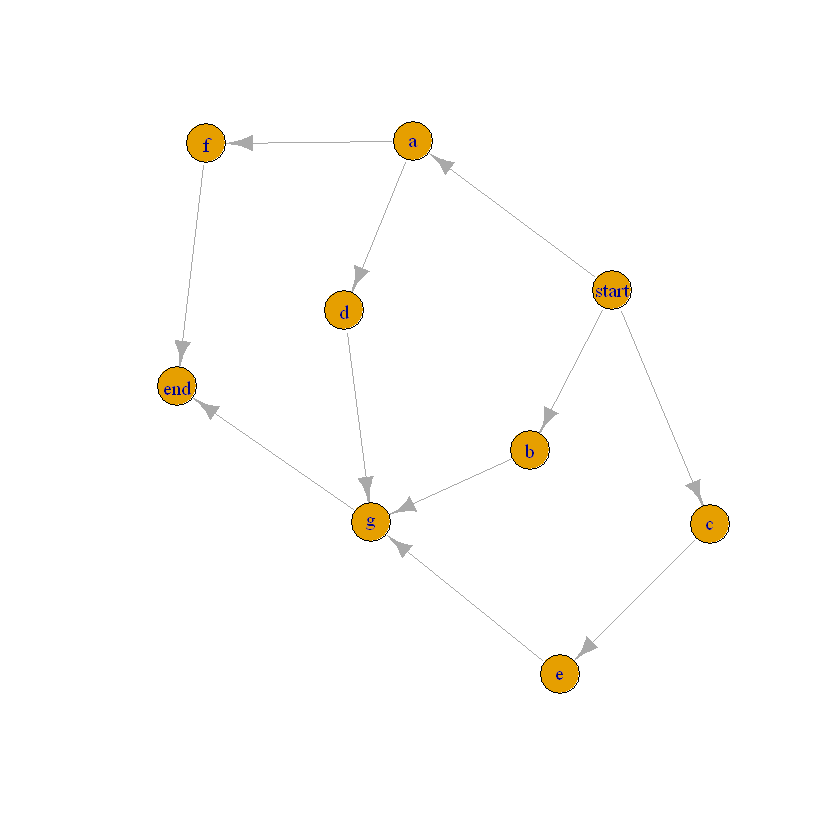

In [2]:
g1 <- graph(edges=c('start','a', 'start','b', 'start', 'c','c','e','a','f',
                     'a','d','f','end','g','end','b','g','e','g','d','g') )
plot(g1)


• Uma aproximação empírica para a duração do projeto mostrado.  

In [38]:
resposta_final <- c()
ant <- c()

simula <- function(p){
resposta <- c()

n <- length(p)
procura_caminho <- function(p,node,anterior,tempo){
    if(node == "end"){
        if(tempo > t){
            print(anterior)
            ant <<- anterior
            t <<- tempo
        }
        
        resposta <<- c(resposta,tempo)

    }
    else{
        for(i in 1:n){
            if(p[[i]][1] == node){  
                t <- tempo + as.numeric(p[[i]][3])
                procura_caminho(p,p[[i]][2], paste(anterior,p[[i]][1],
                                                   sep = "-"), t)
            }
        }   
    }

}
procura_caminho(p,"start","",0)    
resposta_final <<- c(resposta_final,max(resposta))
}    


In [39]:
resposta_final <- c()
caminhos <- c()
t <- 0
precedencia <-  list(c("start","A",2),c("start","B",6),
                     c("start","C",4),c("A","F",4),
                     c("A","D",3),c("B","G",2),
                     c("C","E",5),c("D","G",2),
                     c("E","G",2),c("F","end",0),c("G","end",0))
simula(precedencia)
resposta_final
ant

[1] "-start-A-F"
[1] "-start-A-D-G"
[1] "-start-B-G"
[1] "-start-C-E-G"


[1] 11

[1] "-start-C-E-G"

• Obtenha um estimativa das probabilidades das atividades pertencerem ao caminho crítico  

[1] "-start-C-E-G"
[1] "-start-C-E-G"
[1] "-start-C-E-G"
[1] "-start-C-E-G"
[1] "-start-C-E-G"
[1] "-start-C-E-G"
[1] "-start-C-E-G"
[1] "-start-C-E-G"
[1] "-start-C-E-G"


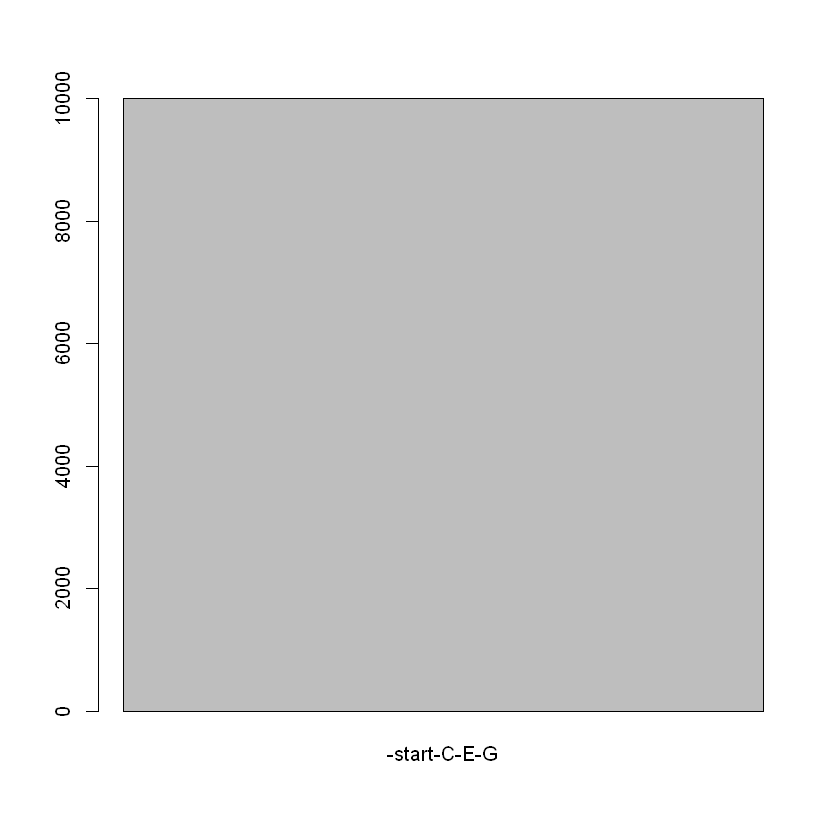

In [40]:
resposta_final <- c()
caminho <- c()
for( h in 1:10000){
precedencia <-  list(c("start","A",rtriangle(1,1,4,2)),
                     c("start","B",rtriangle(1,5,7,6)),
                     c("start","C",rtriangle(1,2,5,4)),
                     c("A","F",rtriangle(1,3,5,4)),
                     c("A","D",rtriangle(1,1,4,3)),
                     c("B","G",rtriangle(1,1,3,2)),
                     c("C","E",rtriangle(1,4,7,5)),
                     c("D","G",rtriangle(1,1,3,2)),
                     c("E","G",rtriangle(1,1,3,2)),
                     c("F","end",0),c("G","end",0))
simula(precedencia)
caminho <<- c(caminho,ant)    
}
barplot(table(caminho))

Uma análise empírica sugere que se B estiver perto do máximo (7) e C e E estiverem perto do mínimo (2 e 4), o caminho crítico passaria a ser start-B-G-end ao invés de start-C-E-G-end, porém rodamos a simulação n vezes (para n muito grande) e em mais de 99.9% não houve troca de caminho crítico, por isso podemos assumir como extremamente improvável.

In [6]:
n <- 1000000
c <- rtriangle(n,2,5,4) + rtriangle(n,4,7,5) - rtriangle(n,5,7,6)
sum(c>=0)/length(c)

[1] 0.99968

• Compare o resultado com aquele obtido pela aproximação PERT.  

In [7]:
resposta_final <- c()
for( h in 1:10000){
precedencia <-  list(c("start","A",rtriangle(1,1,4,2)),
                     c("start","B",rtriangle(1,5,7,6)),
                     c("start","C",rtriangle(1,2,5,4)),
                     c("A","F",rtriangle(1,3,5,4)),
                     c("A","D",rtriangle(1,1,4,3)),
                     c("B","G",rtriangle(1,1,3,2)),
                     c("C","E",rtriangle(1,4,7,5)),
                     c("D","G",rtriangle(1,1,3,2)),
                     c("E","G",rtriangle(1,1,3,2)),
                     c("F","end",0),c("G","end",0))
simula(precedencia)
}
mean(resposta_final)

[1] 11.02633

Em cerca de 50% das simulações, o tempo de conclusão foi superior à 11.

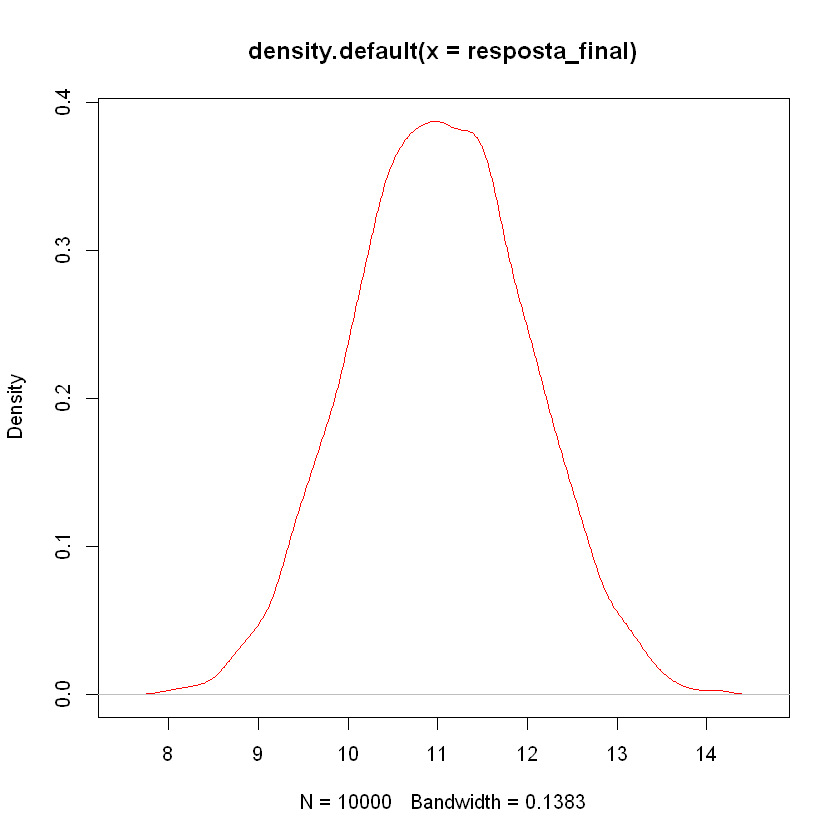

In [8]:
plot(density(resposta_final), col="red")

• Gere todos agendamentos possíveis para o minimo prazo.  

In [55]:
precedencia <-  list(c(1,2,2), c(1,3,6), c(1,4,4), c(2,7,4), c(2,5,3), c(3,8,2), 
                     c(4,6,5), c(5,8,2), c(6,8,2), c(7,9,0),c(8,9,0))

n <- 9
z <- length(precedencia)
inicio_cedo <- rep(0,n)

for(i in 1:n){
    for(j in 1:z){
        if( i == precedencia[[j]][2]){
            item <- precedencia[[j]][1]
            if(inicio_cedo[[i]] <= inicio_cedo[[item]] + precedencia[[item]][3]){
                inicio_cedo[[i]] <- inicio_cedo[[item]] + precedencia[[item]][3]
            }
        }
    
    }
}

inicio_tarde <- rep(inicio_cedo[[n]],n) 

for(i in n:1){
    for(j in 1:z){
        if( i == precedencia[[j]][1]){
            item <- precedencia[[j]][2]
            if(inicio_tarde[[i]] >= inicio_tarde[[item]] - precedencia[[i]][3]){
                inicio_tarde[[i]] <- inicio_tarde[[item]] - precedencia[[i]][3]
            }
        }
    
    }
}

inicio_cedo 
inicio_tarde


[1]  0  2  2  2  8  6  8 11 13

[1]  0  2  7  5  8  9  8 11 13

In [128]:
agendamento <- c()
varia <- function(inicio, cedo,tarde,pos){
    for(i in cedo[[pos]]:tarde[[pos]]){
        inicio[[pos]] <- i
        agendamento <<- rbind(agendamento,inicio)
    }
    
    
}
inicio <- inicio_cedo
varia(inicio, inicio_cedo, inicio_tarde,4)      

n <- length(agendamento)/length(inicio)


for( g in 1:length(inicio)){
    
for(a in g:n){
 varia(agendamento[a,], inicio_cedo, inicio_tarde,a)
    
}
    }

agendamento

inicio,0,2,2,2,8,6,8,11,13
inicio,0,2,2,3,8,6,8,11,13
inicio,0,2,2,4,8,6,8,11,13
inicio,0,2,2,5,8,6,8,11,13
inicio,0,2,2,2,8,6,8,11,13
inicio,0,2,2,3,8,6,8,11,13
inicio,0,2,2,4,8,6,8,11,13
inicio,0,2,3,4,8,6,8,11,13
inicio,0,2,4,4,8,6,8,11,13
inicio,0,2,5,4,8,6,8,11,13
inicio,0,2,6,4,8,6,8,11,13


2- Observe os dados sobre o projeto de uma obra mostrado nas tabela 3. Calcule:  

|Atividade|Descrição|Pred|DMin|DMp|DMax|CMin|CMp|CMax|
|---------|---------|----|----|---|----|----|---|----|
|A|Obter materiais|START|2|4|18|300|450|600|
|B|Obter mão de obra|START|5|9|19|480|600|720|
|C|Escavar|START|4|10|28|3750|4500|5250|
|D|Colocar fundação|C|8|13|36|8400|9600|10800|
|E|Construir Estrutura|B,D|44|60|100|300000|312000|322500|
|F|Instalação Hidráulica|E|30|40|74|37650|39600|41400|
|G|Instalação Elétrica|E|9|20|43|10500|11550|12600|
|H|Acabamento Interior|F,G|24|30|48|36000|38400|40800|
|I|Acabamento Exterior|F|28|29|96|48750|52500|56250|
|J|Limpeza Local|H,I|10|10|12|360|450|540|
Tabela 3 - Atividades

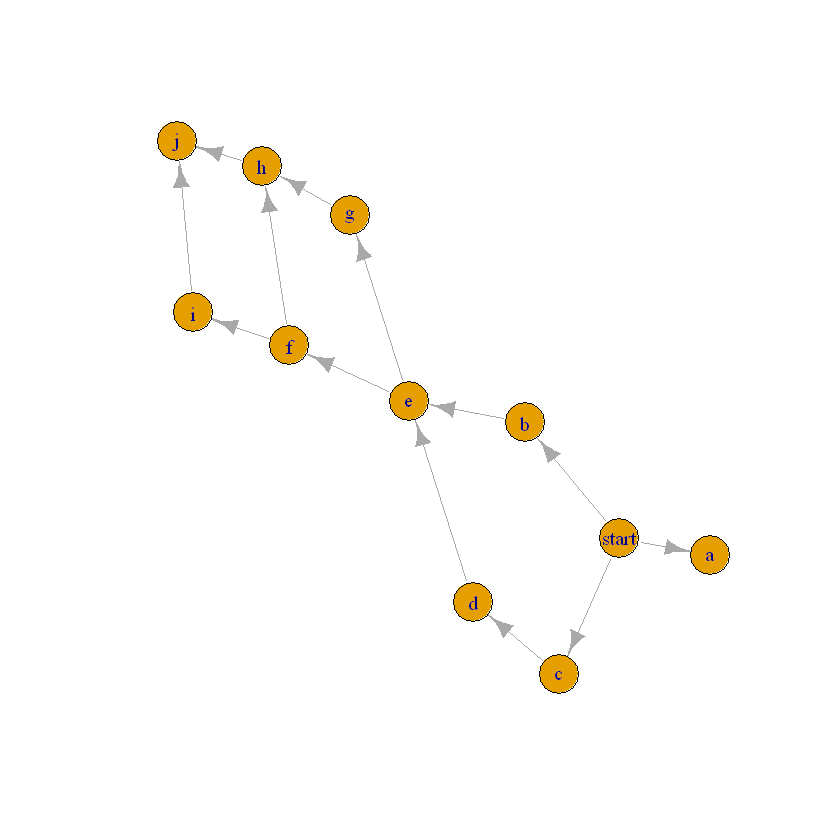

In [10]:
g2 <- graph( edges=c('start','a', 'start','b', 'start', 'c','c','d','b','e',
                     'd','e','e','f','e','g','f','h','g','h','f','i','h',
                     'j','i','j') )
plot(g2)   
 

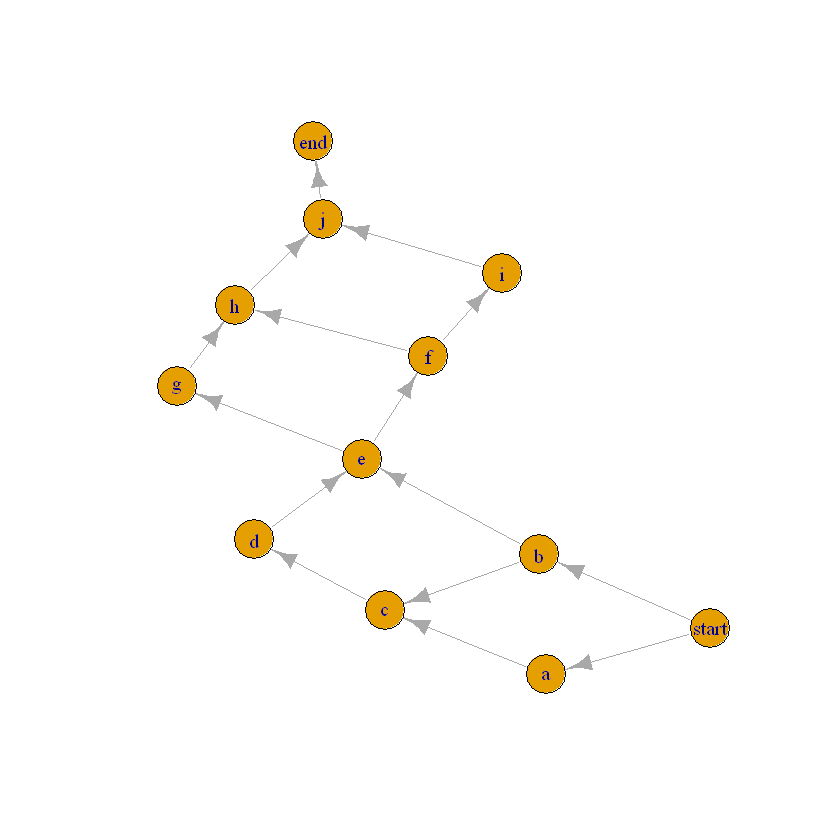

In [11]:
g2 <- graph( edges=c('start','a', 'start','b', 'a', 'c','b','c','c','d',
                     'b','e','d','e','e','f','e','g','f','h','g','h','f',
                     'i','h','j','i','j','j','end') )
plot(g2)   
 

• Obtenha as aproximações para o risco de custo e de prazo da obra  

[1] 469074.6

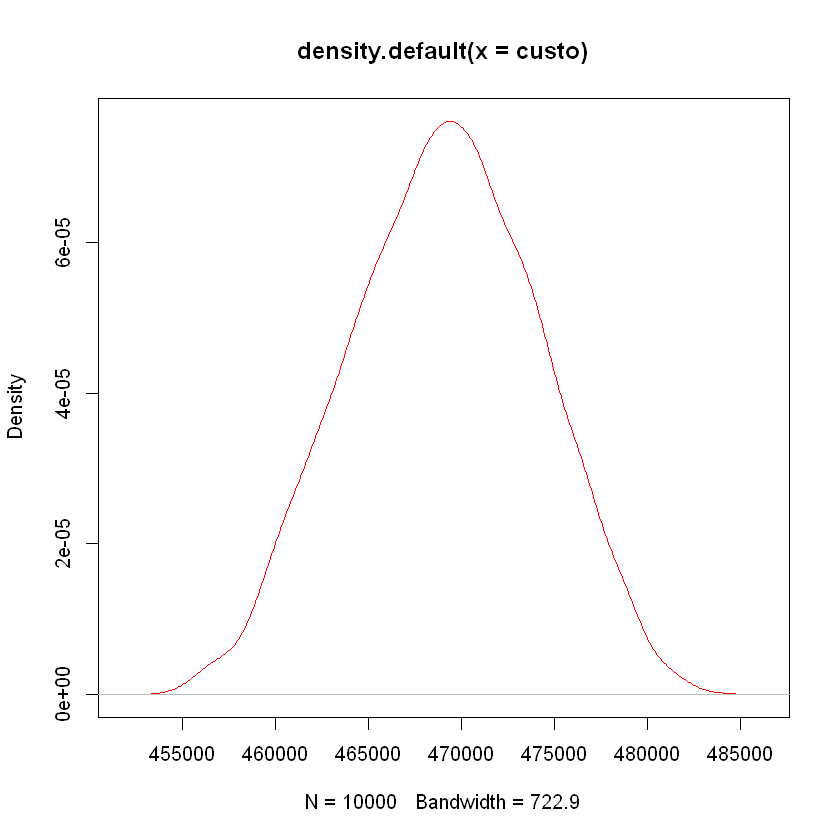

In [12]:
custo <- (rtriangle(10000,300,600,450)+ 
          rtriangle(10000,480,720,600)+ 
          rtriangle(10000,3750,5250,4500)+ 
          rtriangle(10000,8400,10800,9600)+ 
          rtriangle(10000,300000,322500,312000)+ 
          rtriangle(10000,37650,41400,39600)+ 
          rtriangle(10000,10500,12600,11550)+ 
          rtriangle(10000,36000,40800,38400)+ 
          rtriangle(10000,48750,56250,52500)+ 
          rtriangle(10000,360,540,450))
mean(custo)
plot(density(custo), col="red")

In [13]:
resposta_final <- c()
for( h in 1:1000){
precedencia <-  list(c("start","A",rtriangle(1,2,18,4)),
                     c("start","B",rtriangle(1,5,19,9)),
                     c("start","C",rtriangle(1,4,28,10)),
                     c("C","D",rtriangle(1,8,36,13)),
                     c("B","E",rtriangle(1,44,100,60)),
                     c("D","E",rtriangle(1,44,100,60)),
                     c("E","F",rtriangle(1,30,74,40)),
                     c("E","G",rtriangle(1,9,43,20)),
                     c("F","H",rtriangle(1,24,48,30)),
                     c("G","H",rtriangle(1,24,48,30)),
                     c("F","I",rtriangle(1,28,96,29)),
                     c("H","J",rtriangle(1,10,12,10)),
                     c("I","J",rtriangle(1,10,12,10)),                     
                     c("J","end",0),
                     c("J","end",0))
simula(precedencia)
}
mean(resposta_final)

[1] "-start-B-E-F-H-J"
[1] "-start-B-E-F-I-J"
[1] "-start-C-D-E-F-I-J"
[1] "-start-B-E-F-I-J"
[1] "-start-C-D-E-F-I-J"
[1] "-start-C-D-E-F-I-J"
[1] "-start-C-D-E-F-I-J"
[1] "-start-C-D-E-F-I-J"
[1] "-start-C-D-E-F-I-J"


[1] 213.0097

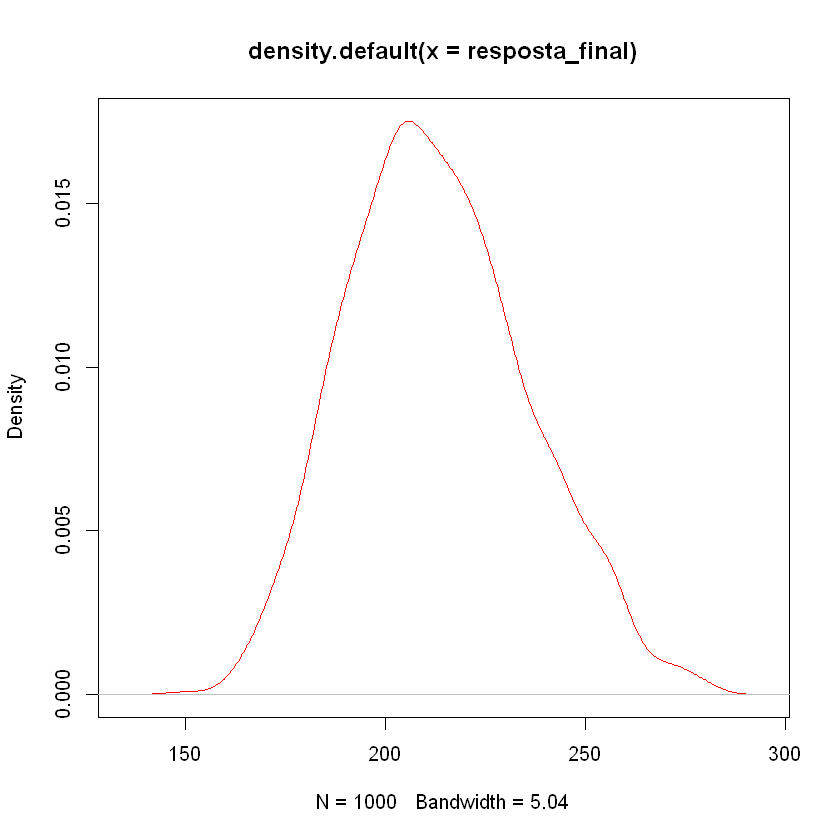

In [14]:
plot(density(resposta_final), col="red")

In [15]:
resposta_final <- c()
for( h in 1:1000){
precedencia <-  list(c("start","A",rtriangle(1,2,18,4)),
                     c("start","B",rtriangle(1,5,19,9)),
                     c("B","C",rtriangle(1,4,28,10)),
                     c("A","C",rtriangle(1,4,28,10)),
                     c("C","D",rtriangle(1,8,36,13)),
                     c("B","E",rtriangle(1,44,100,60)),
                     c("D","E",rtriangle(1,44,100,60)),
                     c("E","F",rtriangle(1,30,74,40)),
                     c("E","G",rtriangle(1,9,43,20)),
                     c("F","H",rtriangle(1,24,48,30)),
                     c("G","H",rtriangle(1,24,48,30)),
                     c("F","I",rtriangle(1,28,96,29)),
                     c("H","J",rtriangle(1,10,12,10)),
                     c("I","J",rtriangle(1,10,12,10)),                     
                     c("J","end",0),
                     c("J","end",0))
simula(precedencia)
}
mean(resposta_final)

[1] "-start-B-C-D-E-F-I-J"
[1] "-start-B-C-D-E-F-I-J"
[1] "-start-A-C-D-E-F-I-J"
[1] "-start-B-C-D-E-F-I-J"
[1] "-start-B-C-D-E-F-I-J"


[1] 224.7736

• Obtenha uma estimativa das probabilidades das atividades pertencerem ao caminho crítico  

[1] "-start-A-C-D-E-F-I-J"


[1] 224.8073

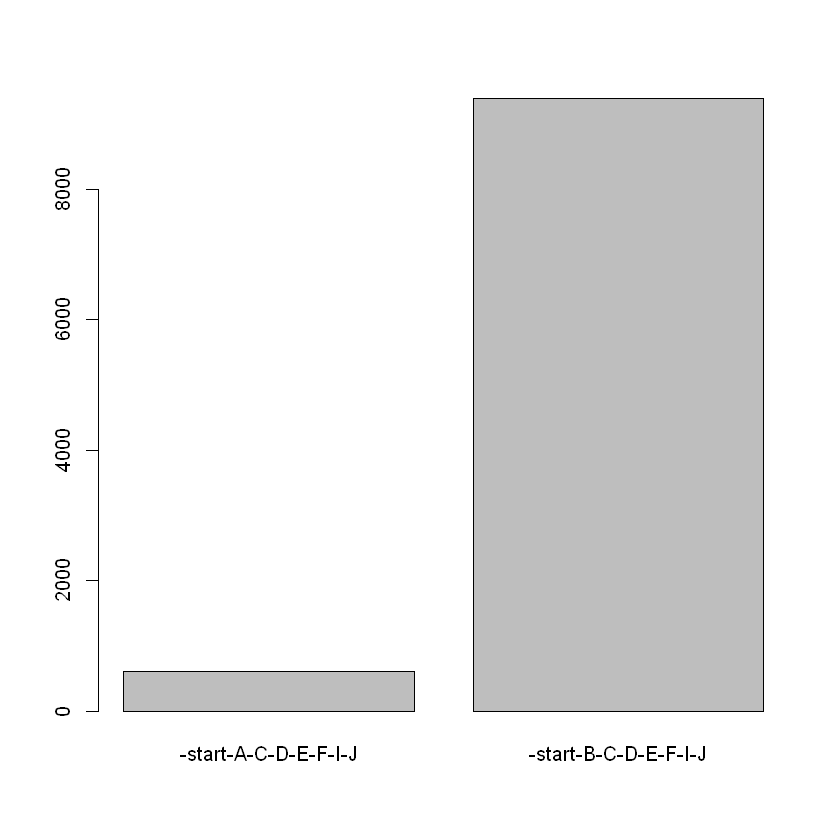

In [16]:
resposta_final <- c()
caminho <- c()
for( h in 1:10000){
precedencia <-  list(c("start","A",rtriangle(1,2,18,4)),
                     c("start","B",rtriangle(1,5,19,9)),
                     c("B","C",rtriangle(1,4,28,10)),
                     c("A","C",rtriangle(1,4,28,10)),
                     c("C","D",rtriangle(1,8,36,13)),
                     c("B","E",rtriangle(1,44,100,60)),
                     c("D","E",rtriangle(1,44,100,60)),
                     c("E","F",rtriangle(1,30,74,40)),
                     c("E","G",rtriangle(1,9,43,20)),
                     c("F","H",rtriangle(1,24,48,30)),
                     c("G","H",rtriangle(1,24,48,30)),
                     c("F","I",rtriangle(1,28,96,29)),
                     c("H","J",rtriangle(1,10,12,10)),
                     c("I","J",rtriangle(1,10,12,10)),                     
                     c("J","end",0),
                     c("J","end",0))
simula(precedencia)
caminho <<- c(caminho,ant)    
}
mean(resposta_final)
barplot(table(caminho))

• Faça um grafico de dispersão mostrando a correlação entre prazo e custo da obra.  

In [17]:
cor(custo,resposta_final)

[1] -0.006394711

A correlação entre custo e prazo é praticamente nula, indicando que, neste modelo, uma variação no prazo não contribui para a variação do custo.

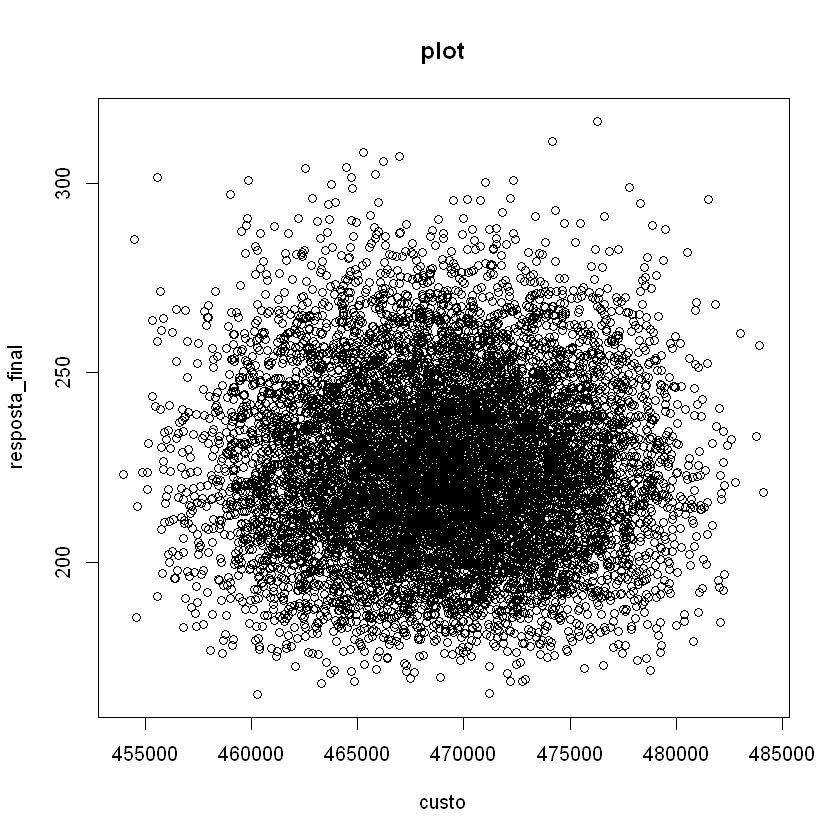

In [18]:
plot(custo,resposta_final, main="plot")

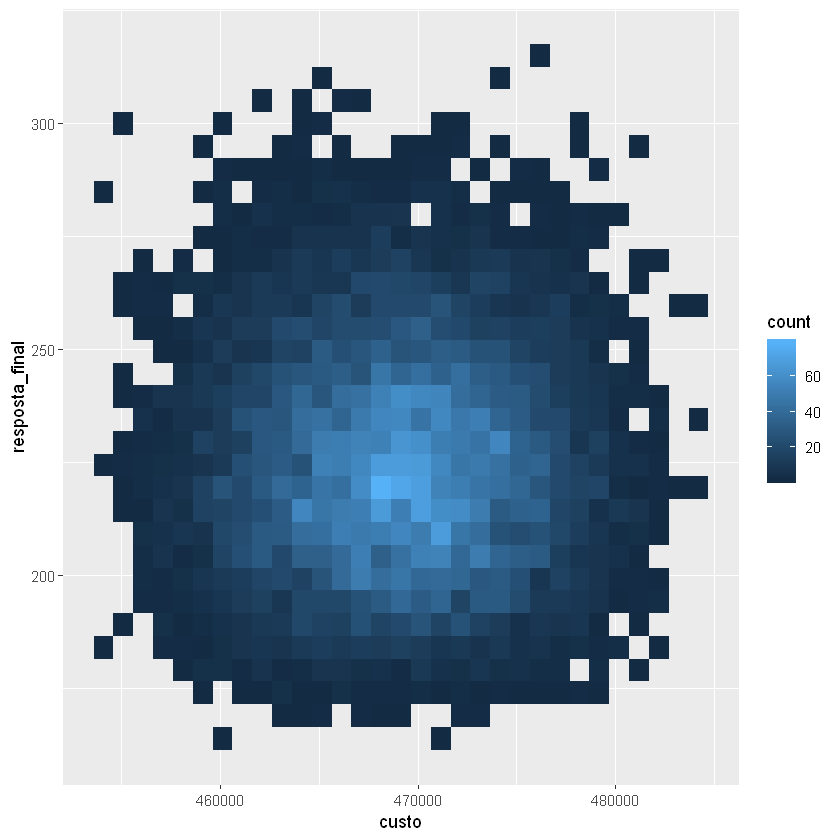

In [19]:
df <- data.frame(custo,resposta_final)
qplot(custo,resposta_final,data=df, geom='bin2d')

3- Dado a rede de projeto mostrada na figura 1, aplique a técnica de MC para obter um agendamento que proporciona uma boa aproximação para o máximo NPV a ser obtido pelo projeto. O número na parte de cima do circulo representando uma atividade é sua duração e o abaixo é o seu NPV trazido para o término da atividade. Assuma:  
• que a data limite δn = 44  
• valor presente é continuamente descontado a uma taxa r = 0.01  
Passos:  
• gerar a relação (atividade, est, lst)  
• implementar uma função que sorteia um cronograma  
• implementar uma função que verifica se o cronograma é valido  
• avaliar a qualidade da aproximação para a solução ótima  

|Atividade|Predecessor|Duração|NPV|
|---------|-----------|-------|---|
|1|START|0|0|
|2|1|6|-140|
|3|1|5|318|
|4|1|3|312|
|5|3|1|-329|
|6|3|6|153|
|7|3|2|193|
|8|4,7|1|361|
|9|2|4|24|
|10|5|3|33|
|11|7|2|387|
|12|6,10,11|3|-386|
|13|8,12|5|171|
|14|9,13|0|0|

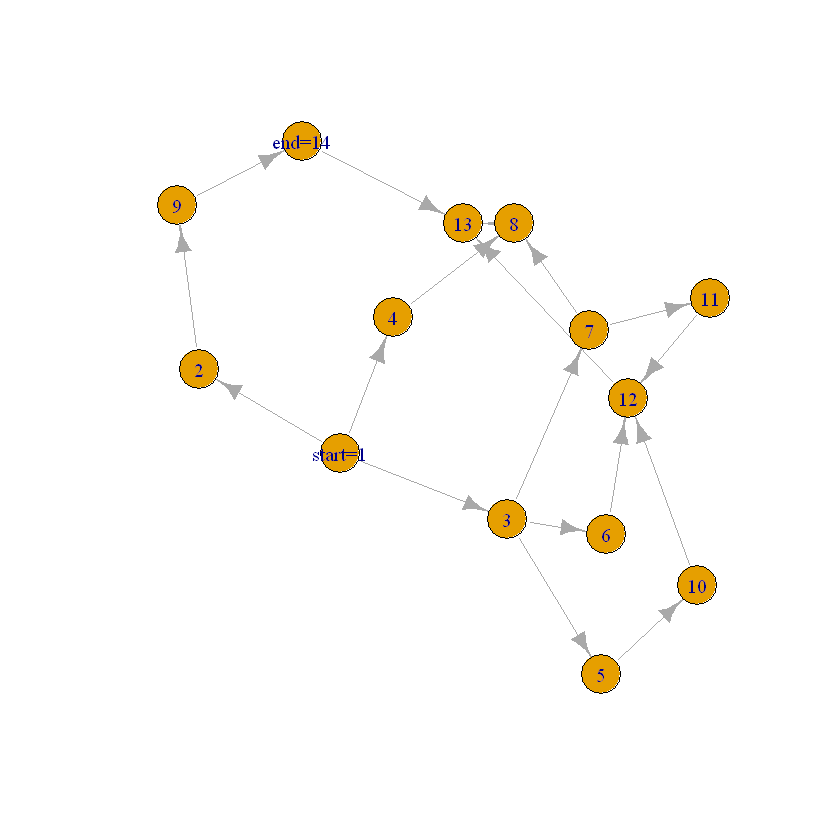

In [20]:
g3 <- graph(edges=c('start=1',2,'start=1',3,'start=1',4,3,5,3,6,3,7,
                     4,8,7,8,2,9,5,10,7,11,
                     6,12,10,12,11,12,8,13,12,13,'end=14',13,9,'end=14') )
plot(g3)   

In [21]:
n <- 14
duracao_max <- 44
duracao <- c(0,6,5,3,1,6,2,1,4,3,2,3,5,0)
valor <- c(0,-140,318,312,-329,153,193,361,24,33,387,-386,171,0)
precedencia <- list(c(1,2),c(1,3),c(1,4),c(2,9),c(3,5),c(3,6),c(3,7),
                    c(4,8),c(5,10),c(6,12),c(7,8),c(7,11),c(8,13),
                    c(9,14),c(10,12),c(11,12),c(12,13),c(13,14))
z <- length(precedencia)
inicio_cedo <- rep(0,14)
inicio_tarde <- rep(duracao_max,14) 
for(i in 1:n){
    for(j in 1:z){
        if( i == precedencia[[j]][2]){
            item <- precedencia[[j]][1]
            if(inicio_cedo[[i]] <= inicio_cedo[[item]] + duracao[[item]]){
                inicio_cedo[[i]] <- inicio_cedo[[item]] + duracao[[item]]
            }
        }
    
    }
}

for(i in n:1){
    for(j in 1:z){
        if( i == precedencia[[j]][1]){
            item <- precedencia[[j]][2]
            if(inicio_tarde[[i]] >= inicio_tarde[[item]] - duracao[[i]]){
                inicio_tarde[[i]] <- inicio_tarde[[item]] - duracao[[i]]
            }
        }
    
    }
}

inicio_cedo 
inicio_tarde


[1]  0  0  0  0  5  5  5  7  6  6  7 11 14 19

[1] 25 34 25 35 32 30 32 38 40 33 34 36 39 44

In [22]:
valida <- function(inicio, precedencia, duracao, prazo){
    z <- length(precedencia)
    n <- length(inicio)
    for(i in 1:n){
        if(inicio[[i]] + duracao[[i]] > prazo) {
            return(0)
        }
    }
    
    for(i in 1:z){
        if(inicio[[precedencia[[i]][2]]] < inicio[[precedencia[[i]][1]]] + 
           duracao[[precedencia[[i]][1]]]){
            return(0)
        }
    }
    return(1)
}

In [23]:
npv <- function(inicio, valor,taxa){
    npv0 <- 0
    n <- length(inicio)
    
    for(i in 1:n){
        npv0 <- npv0 + valor[[i]] * (1 - taxa)^(inicio[[i]] + duracao[[i]])
    }
    npv0
}

In [24]:
adia <- function(inicio,duracao,precedencia){
    n <- length(inicio)
    z <- length(precedencia)
    for(j in 1:z){
        if( inicio[[precedencia[[j]][1]]] + 
           duracao[[precedencia[[j]][1]]] >  inicio[[precedencia[[j]][2]]]){
            inicio[[precedencia[[j]][2]]] <- inicio[[precedencia[[j]][1]]] +
            duracao[[precedencia[[j]][1]]]
            
            if(valida(inicio, precedencia, duracao, duracao_max)){
                
                return(inicio)  
            }   
        }
    }
    if(valida(inicio, precedencia, duracao, duracao_max)){
        return(inicio)  
    }
}

In [25]:
inicio <- inicio_cedo
for(i in 1:n){
    novo <- inicio
    v <- inicio_tarde[[i]] - novo[[i]]
    for(u in novo[[i]]:inicio_tarde[[i]]){
    novo[[i]] <- u
    novo <- adia(novo,duracao,precedencia)
                if(valida(novo, precedencia, duracao, duracao_max)){
            print(c(round(novo), round(npv(novo, valor,0.01))))
        }
    if(npv(novo, valor,0.01) > npv(inicio, valor,0.01) ){
        if(valida(novo, precedencia, duracao, duracao_max)){
            inicio <- novo
        }
    }
}
    }
inicio
npv(inicio, valor,0.01)

 [1]    0    0    0    0    5    5    5    7    6    6    7   11   14   19 1025
 [1]    1    1    1    1    6    6    6    8    7    7    8   12   15   20 1015
 [1]    2    2    2    2    7    7    7    9    8    8    9   13   16   21 1005
 [1]   3   3   3   3   8   8   8  10   9   9  10  14  17  22 994
 [1]   4   4   4   4   9   9   9  11  10  10  11  15  18  23 985
 [1]   5   5   5   5  10  10  10  12  11  11  12  16  19  24 975
 [1]   6   6   6   6  11  11  11  13  12  12  13  17  20  25 965
 [1]   7   7   7   7  12  12  12  14  13  13  14  18  21  26 955
 [1]   8   8   8   8  13  13  13  15  14  14  15  19  22  27 946
 [1]   9   9   9   9  14  14  14  16  15  15  16  20  23  28 936
 [1]  10  10  10  10  15  15  15  17  16  16  17  21  24  29 927
 [1]  11  11  11  11  16  16  16  18  17  17  18  22  25  30 918
 [1]  12  12  12  12  17  17  17  19  18  18  19  23  26  31 908
 [1]  13  13  13  13  18  18  18  20  19  19  20  24  27  32 899
 [1]  14  14  14  14  19  19  19  21  20  20 

[1]  0 34  0  0 32  5  5  7 40 33  7 36 39 44

[1] 1166.336